**Reference**: 

https://www.youtube.com/watch?v=s2K1JfNR7Sc

http://databookuw.com/page-2/page-21/

Steve Brunton (MIT)

https://towardsdatascience.com/clean-up-data-noise-with-fourier-transform-in-python-7480252fd9c9


https://www.techopedia.com/definition/7292/fourier-transform

Import libraries and setup

In [2]:
#Import maths library
import numpy as np
#import library to draw plot
import matplotlib.pyplot as plt


In [3]:
#define size of the plot to be drawn.
plt.rcParams['figure.figsize'] = [16, 12]

# update rc (runtime configuration) from default to any
plt.rcParams.update({'font.size': 18})


In [4]:
# Create a simple signal with two frequencies 50Hz an 120Hz 

dt = 0.001 # frame difference 0.001
t = np.arange(0,1,dt)
f1 = np.sin(2*np.pi*60*t) #first signal f1 50Hz
f2 = np.sin(2*np.pi*150*t) # second singal f2 120Hz



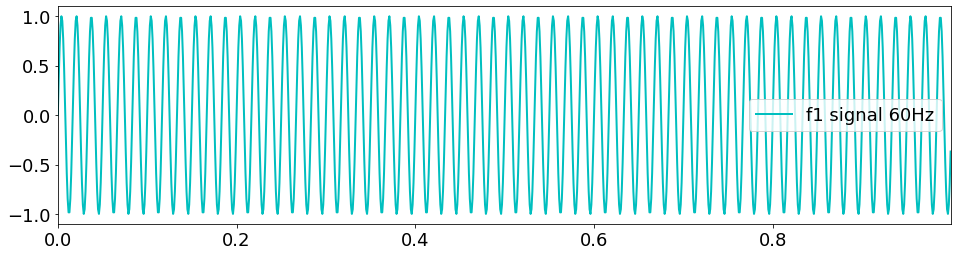

In [5]:
#plot signals f1 and f2

plt.rcParams['figure.figsize'] = [16, 4]
plt.plot(t,f1,color='c',LineWidth=2,label='f1 signal 60Hz')
plt.xlim(t[0],t[-1])
plt.legend()
plt.savefig('signal_60hz.png')
plt.show()

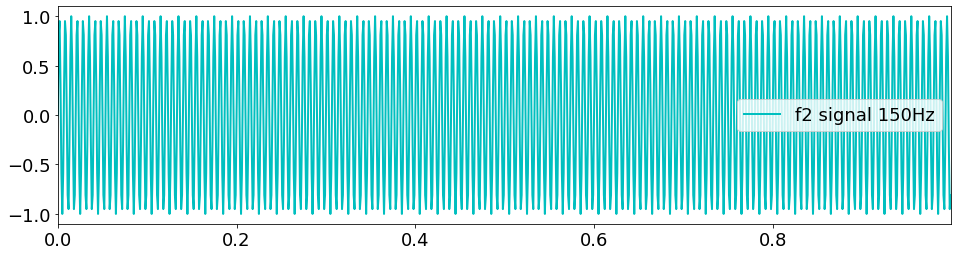

In [6]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.plot(t,f2,color='c',LineWidth=2,label='f2 signal 150Hz')
plt.xlim(t[0],t[-1])
plt.legend()
plt.savefig('signal_150hz.png')
plt.show()

Sum of both signals f1 and f2 (interference)

In [7]:
f_clean= f1 + f2 #np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies


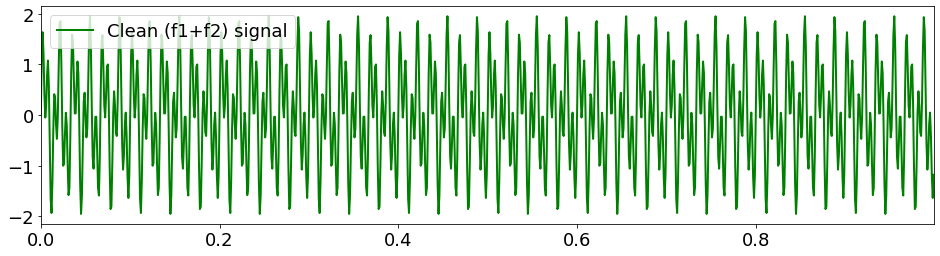

In [8]:
#plot clean sum of two signals f1 and f2

plt.rcParams['figure.figsize'] = [16, 4]
plt.plot(t,f_clean,color='g',LineWidth=2,label='Clean (f1+f2) signal')
plt.xlim(t[0],t[-1])
plt.legend()
plt.savefig('sum_signals.png')
plt.show()

In [9]:
#add some random noise to the signal.
f = f_clean + 2.5*np.random.randn(len(t))

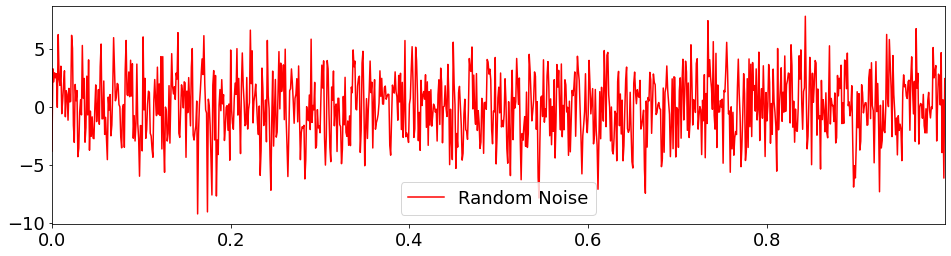

In [10]:
#plot Noise signal

plt.rcParams['figure.figsize'] = [16, 4]
plt.plot(t,f,color='r',LineWidth=1.5,label='Random Noise')
plt.xlim(t[0],t[-1])
plt.legend()
plt.savefig('with_noise.png')
plt.show()

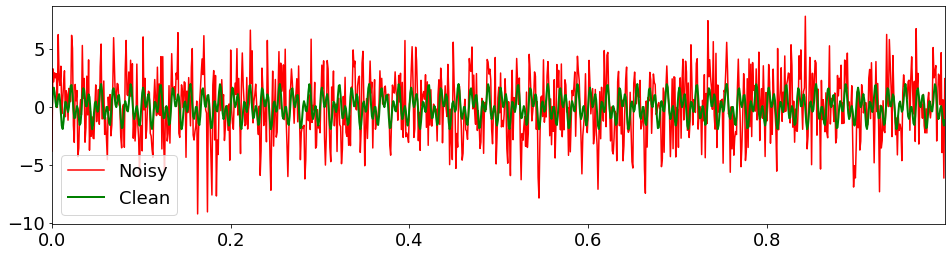

In [11]:
#Plot data signal with noisy signal
plt.plot(t,f,color='r',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='g',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.savefig('original_noisy.png')
plt.legend()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


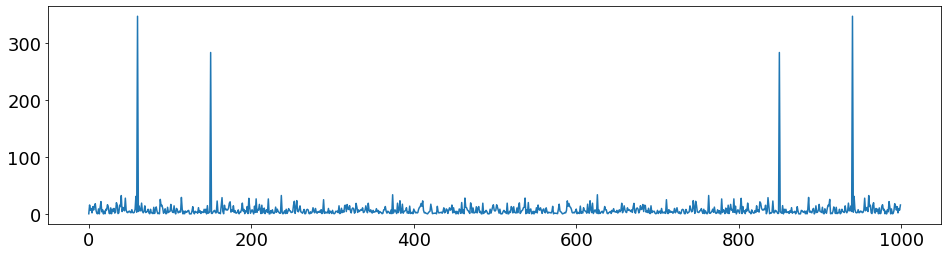

In [12]:
#converting time domain into frequency domian.
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum density (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs


plt.plot(freq,PSD)
plt.savefig('time_to_freq.png')
plt.show()
#plt.plot(freq, PSD[L],color='g',LineWidth=1.5,label='Filtered')

Real-world vibration data typically consists of a broad range of different frequencies that aren't obvious in the time domain. So engineers turn to the power spectral density (PSD) to represent a signal in the frequency domain which has the benefits over simpler Fourier transforms (FFT) because the results are independent of time duration, sample rate, or frequency bin width

https://blog.endaq.com/calculate-power-spectral-density-using-the-endaq-open-source-python-library

In [13]:
## Use the PSD (power spectral density) to filter out noise
# removing noise in frequency domian.

indices = PSD > 120       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


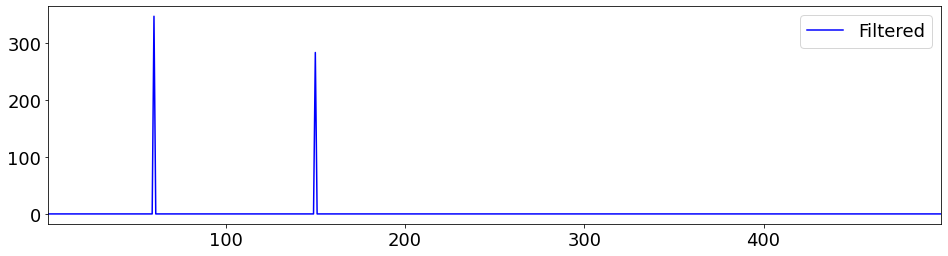

In [14]:
#plot removing the noise by applying threshold of PSD>100 in frequecy domain
#plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()


plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


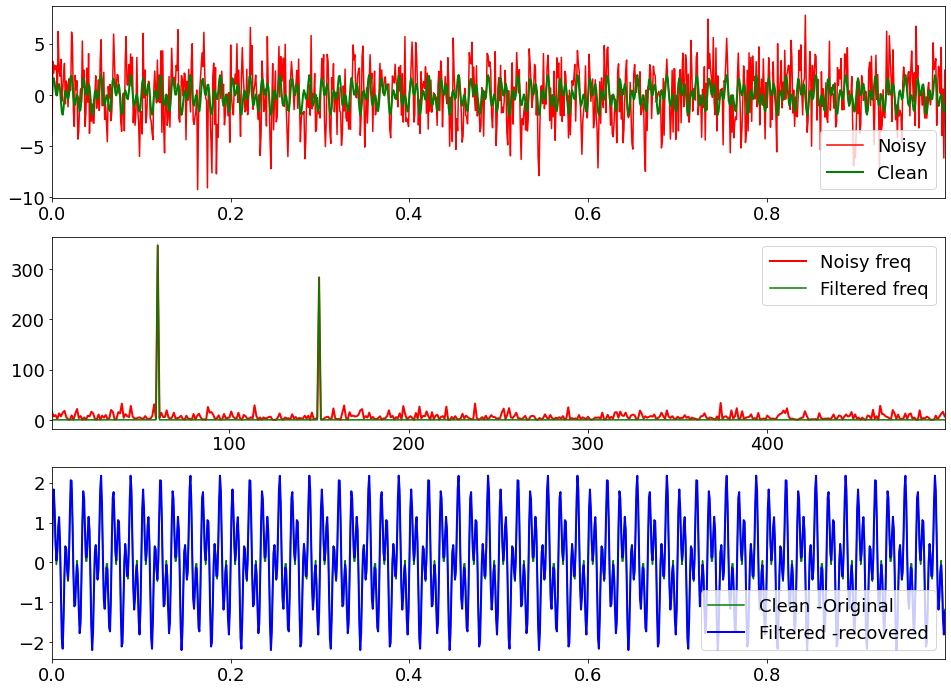

In [15]:
## Plots
plt.rcParams['figure.figsize'] = [16, 12]
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='g',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy freq')
plt.plot(freq[L],PSDclean[L],color='g',LineWidth=1.5,label='Filtered freq')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()


plt.sca(axs[2])

plt.plot(t,f_clean,color='g',LineWidth=1.5,label='Clean -Original')
plt.plot(t,ffilt,color='b',LineWidth=2,label='Filtered -recovered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()